<a href="https://colab.research.google.com/github/limchawei/testing3.github.io/blob/main/Exchange_Rates_Average_For_Period_Monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OK FINAL

Mounted at /content/drive
Preview header name after rename column (A1):
  Exchange currency  2024Nov  2024Oct  2024Sep  2024Aug  2024Jul  2024Jun  \
0         US Dollar   1.3365    1.309   1.2964   1.3159   1.3469   1.3516   

   2024May  2024Apr  2024Mar  ...  1988Oct  1988Sep  1988Aug  1988Jul  \
0   1.3512   1.3569   1.3401  ...   2.0214   2.0398   2.0411   2.0462   

   1988Jun  1988May  1988Apr  1988Mar  1988Feb  1988Jan  
0   2.0269   2.0098   2.0037   2.0133   2.0173   2.0253  

[1 rows x 444 columns]

Preview the changed Year Month after adding space:
  Exchange currency  2024 Nov  2024 Oct  2024 Sep  2024 Aug  2024 Jul  \
0         US Dollar    1.3365     1.309    1.2964    1.3159    1.3469   

   2024 Jun  2024 May  2024 Apr  2024 Mar  ...  1988 Oct  1988 Sep  1988 Aug  \
0    1.3516    1.3512    1.3569    1.3401  ...    2.0214    2.0398    2.0411   

   1988 Jul  1988 Jun  1988 May  1988 Apr  1988 Mar  1988 Feb  1988 Jan  
0    2.0462    2.0269    2.0098    2.0037    2.0133 

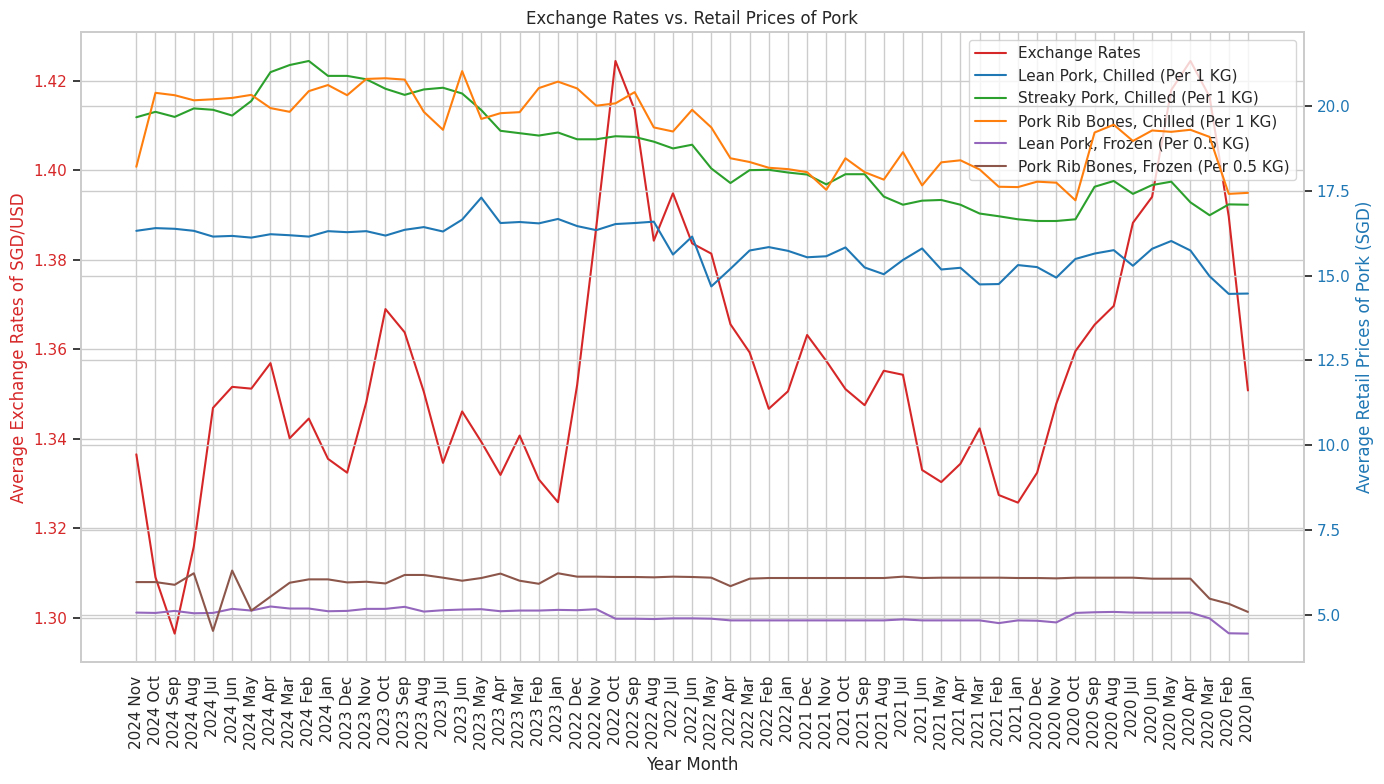

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

BOLD = '\033[1m' # start bold formatting
END = '\033[0m' # end bold formatting

# Load data
file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/ExchangeRatesAverageForPeriodMonthly.csv'

df = pd.read_csv(file_path)

# Delete unnecessary rows
df = df.drop(index=range(1, 15))

# Rename the 'DataSeries' column to 'Exchange currency'
df = df.rename(columns={'DataSeries': 'Exchange currency'})

# Preview header name
print(f'{BOLD}Preview header name after rename column (A1):{END}')
print(df.head())

# Function to add space between numbers and letters
def add_space(header):
    new_header = ""
    for i, char in enumerate(header):
        if char.isalpha() and i > 0 and header[i - 1].isdigit():
            new_header += " "  # Add space before the letter
        new_header += char
    return new_header

# Apply space from second column onward
df.columns = [df.columns[0]] + [add_space(col) for col in df.columns[1:]]

# Preview the changed Year Month after adding space
print(f'\n{BOLD}Preview the changed Year Month after adding space:{END}')
print(df)


# Save updated DataFrame
output_file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/ExchangeRatesAverageForPeriodMonthly_updated.csv'

df.to_csv(output_file_path, index=False)

#---------------------------------------------------------

# Load data
prices_file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/AverageRetailPricesOfSelectedConsumerItemsMonthly.csv'

prices_df = pd.read_csv(prices_file_path)

# Drop unnecessary rows
prices_df = prices_df.drop(index=list(range(0, 5)) + list(range(7, 8)) + list(range(9, 14)) + list(range(16, 72)))

# Function to add space between numbers and letters
def prices_add_space(header):
    prices_new_header = ""
    for i, char in enumerate(header):
        if char.isalpha() and i > 0 and header[i - 1].isdigit():
            prices_new_header += " "  # Add space before the letter
        prices_new_header += char
    return prices_new_header

# Apply function only from the second column onward
prices_df.columns = [prices_df.columns[0]] + [prices_add_space(col) for col in prices_df.columns[1:]]

# Display updated DataFrame
print(prices_df)


# Save updated DataFrame
prices_output_file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/AverageRetailPricesOfSelectedConsumerItemsMonthly_date updated.csv'

prices_df.to_csv(prices_output_file_path, index=False)

#---------------------------------------------------------


# Load Exchange Rates data
exchange_file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/ExchangeRatesAverageForPeriodMonthly_updated.csv'
df = pd.read_csv(exchange_file_path)

# Load Prices data
prices_file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/AverageRetailPricesOfSelectedConsumerItemsMonthly_date updated.csv'
prices_df = pd.read_csv(prices_file_path)

# Extract relevant rows & columns
x_labels = df.columns[1:60]
exchange_rates = df.iloc[0, 1:60]
lean_pork_chilled_prices = prices_df.iloc[0, 1:60]
streaky_pork_chilled = prices_df.iloc[1, 1:60]
pork_rib_bones_chilled = prices_df.iloc[2, 1:60]
lean_pork_frozen = prices_df.iloc[3, 1:60]
pork_rib_bones_frozen = prices_df.iloc[4, 1:60]


print('\nPreview x_labels')
print(x_labels)

print('\nPreview prices')
print(prices_df.iloc[0:1, 0:60])
print()
print(prices_df.iloc[1:2, 0:60])
print()
print(prices_df.iloc[2:3, 0:60])
print()
print(prices_df.iloc[3:4, 0:60])
print()


# Plot using Seaborn
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 8))

# Left y-axis (Exchange Rates)
ax1.set_xlabel("Year Month")
ax1.set_ylabel("Average Exchange Rates of SGD/USD", color='tab:red')
sns.lineplot(x=x_labels, y=exchange_rates, ax=ax1, color='tab:red', label="Exchange Rates")
ax1.tick_params(axis='y', labelcolor='tab:red')
plt.xticks(rotation=90)

# Right y-axis (Retail Prices)
ax2 = ax1.twinx()
ax2.set_ylabel("Average Retail Prices of Pork (SGD)", color='tab:blue')
sns.lineplot(x=x_labels, y=lean_pork_chilled_prices, ax=ax2, color='tab:blue', label="Lean Pork, Chilled (Per 1 KG)")
sns.lineplot(x=x_labels, y=streaky_pork_chilled, ax=ax2, color='tab:green', label="Streaky Pork, Chilled (Per 1 KG)")
sns.lineplot(x=x_labels, y=pork_rib_bones_chilled, ax=ax2, color='tab:orange', label="Pork Rib Bones, Chilled (Per 1 KG)")
sns.lineplot(x=x_labels, y=lean_pork_frozen, ax=ax2, color='tab:purple', label="Lean Pork, Frozen (Per 0.5 KG)")
sns.lineplot(x=x_labels, y=pork_rib_bones_frozen, ax=ax2, color='tab:brown', label="Pork Rib Bones, Frozen (Per 0.5 KG)")
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Remove the second axis' automatic legend
ax2.legend_.remove()

# Title
plt.title("Exchange Rates vs. Retail Prices of Pork")
fig.tight_layout()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper right')

plt.show()


Bokeh

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Select, Slider, CustomJS, LinearAxis, Range1d, HoverTool
from bokeh.layouts import column
from bokeh.palettes import Category10
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load data
exchange_file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/ExchangeRatesAverageForPeriodMonthly_updated.csv'
prices_file_path = '/content/drive/MyDrive/Colab Notebooks/CA2/CA2 data/AverageRetailPricesOfSelectedConsumerItemsMonthly_date updated.csv'

df = pd.read_csv(exchange_file_path)
prices_df = pd.read_csv(prices_file_path)

# Extract relevant rows & columns
x_labels = df.columns[1:60]
exchange_rates = df.iloc[0, 1:60].astype(float)
price_data = {
    "Lean Pork, Chilled": prices_df.iloc[0, 1:60].astype(float),
    "Streaky Pork, Chilled": prices_df.iloc[1, 1:60].astype(float),
    "Pork Rib Bones, Chilled": prices_df.iloc[2, 1:60].astype(float),
    "Lean Pork, Frozen": prices_df.iloc[3, 1:60].astype(float),
    "Pork Rib Bones, Frozen": prices_df.iloc[4, 1:60].astype(float)
}

# Prepare Bokeh figure
output_notebook()
source = ColumnDataSource(data={
    "x": list(x_labels),
    "y_prices": list(price_data["Lean Pork, Chilled"]),
    "y_exchange": list(exchange_rates)
})

p = figure(x_range=list(x_labels), title="Average Exchange Rates vs. Average Retail Prices of Pork", width=800, height=500)

# Add axis labels
p.xaxis.axis_label = "Year Month"
p.yaxis.axis_label = "Average Exchange Rates of SGD/USD"

# Rotate x-axis labels
p.xaxis.major_label_orientation = 90  # Rotate labels 90 degrees

# Left y-axis (Exchange Rates)
exchange_line = p.line("x", "y_exchange", source=source, color=Category10[10][0], legend_label="Exchange Rates", line_width=2)

# Adjust y-axis range and interval for Exchange Rates
p.y_range.start = int(min(exchange_rates))  # Set minimum y value
p.y_range.end = int(max(exchange_rates)) + 1  # Set maximum y value

# Right y-axis (Prices)
p.extra_y_ranges = {"price": Range1d(start=min(price_data["Lean Pork, Chilled"]), end=max(price_data["Lean Pork, Chilled"]))}
p.add_layout(LinearAxis(y_range_name="price", axis_label="Average Retail Prices of Pork (SGD)"), "right")

price_line = p.line("x", "y_prices", source=source, color=Category10[10][1], legend_label="Lean Pork, Chilled", line_width=2, y_range_name="price")

# ---- Added HoverTool functionality ----
hover = HoverTool(
    tooltips=[
        ("Date", "@x"),
        ("Exchange Rate", "@y_exchange"),
        ("Price", "@y_prices")
    ],
    mode="vline"  # Use vertical line hover mode
)
p.add_tools(hover)
# ----------------------------------------

# Widgets
select = Select(title="Select Price Category", value="Lean Pork, Chilled", options=list(price_data.keys()))
slider = Slider(start=1, end=59, value=59, step=1, title="Select Date in Month")

# JavaScript callback for the dropdown
select_callback = CustomJS(args=dict(source=source, price_data=price_data, select=select, slider=slider, x_labels=x_labels, p=p), code="""
    const selected_category = select.value;
    const data = source.data;
    const prices = price_data[selected_category];
    const max_range = Math.max(...prices);

    // Update data for the selected category
    data['y_prices'] = prices.slice(0, slider.value);  // Filter data based on slider value
    data['x'] = x_labels.slice(0, slider.value);

    // Update the y-axis range for prices
    p.extra_y_ranges.price.start = Math.min(...data['y_prices']);
    p.extra_y_ranges.price.end = max_range;

    source.change.emit();
""")
select.js_on_change("value", select_callback)

# JavaScript callback for the slider
slider_callback = CustomJS(args=dict(source=source, price_data=price_data, select=select, slider=slider, x_labels=x_labels, exchange_rates=exchange_rates), code="""
    const selected_category = select.value;
    const data = source.data;
    const prices = price_data[selected_category];

    // Update data based on slider value (filter the range of x, y_prices, and y_exchange)
    data['y_prices'] = prices.slice(0, slider.value);
    data['y_exchange'] = exchange_rates.slice(0, slider.value);
    data['x'] = x_labels.slice(0, slider.value);

    source.change.emit();
""")
slider.js_on_change("value", slider_callback)

# Layout
layout = column(select, slider, p)
show(layout)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
